# **Object Detection on Custom Robot Joint Dataset: A Comparison of YOLOv8 and Faster R-CNN Models**

### Author: Valdis Visvaldis Lenkevics

#### Supervisor: Peng Wang



## **Notebook introduction:**

This Colab Notebook contains two popular object detection models, Yolo v8 (Ultralytics) and Faster-RCNN (MMDetection). These models have been trained with a custom dataset that has been collected by the author, which consists of photos of a Turtlebot 3 Waffle PI robot with manipulator. 


These models' main goal is to precisely classify the robot arm/manipulator's joints. In this notebook, author has trained both models on the custom dataset.

## **Table of Contents:**

*   Section 1: Importing necessary libraries
> *   Section 1.1 Installing packages
> *   Section 1.2 Downloading pre-trained model
> *   Section 1.3 Importing libraries
*   Section 2: Obtaining Dataset
*   Section 3: Data preparation and exploration
*   Section 4: Training Models (including evaluation on validation data set)
> *   Section 4.1: Faster-RCNN (MMDectection)
>  *  Section 4.1.2 Faster R-CNN model evaluation on validation data set
> *   Section 4.2: Yolo v8 (Ultralytics)
>  * Section 4.2.2 YOLO v8 model evaluation on validation data set
*   Section 5: Evaluating trained model results
> * Section 5.1: Faster R-CNN model evaluation on testing data set
> * Section 5.2: YOLO v8 Evaluation on testing data set

## **Section 1. Importing necessary libraries**

### **Section 1.1 Installing packages**

In [1]:
# Yolo v8 (Ultralytics)
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.1/562.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 26.4 MB/s eta 0:00:00


In [2]:
# Removing default torch versions installed by Colab. To install specific version later
!pip uninstall torch -y
!pip uninstall torchtext -y
!pip uninstall torchdata -y
!pip uninstall torchaudio -y

Found existing installation: torch 2.0.0+cu118
Uninstalling torch-2.0.0+cu118:
  Successfully uninstalled torch-2.0.0+cu118
Found existing installation: torchtext 0.15.1
Uninstalling torchtext-0.15.1:
  Successfully uninstalled torchtext-0.15.1
Found existing installation: torchdata 0.6.0
Uninstalling torchdata-0.6.0:
  Successfully uninstalled torchdata-0.6.0
Found existing installation: torchaudio 2.0.1+cu118
Uninstalling torchaudio-2.0.1+cu118:
  Successfully uninstalled torchaudio-2.0.1+cu118


In [3]:
# Install specific version of torch, torchvision with cuda support
!pip install torch==1.12.0+cu113 torchvision==0.13.0+cu113 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 929.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118


In [4]:
# Check torch version: Should be 1.12.0+cu1113
import torch
print(torch.__version__)

1.12.0+cu113


In [5]:
# Install mmcv
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html

# Install mmdetection
!rm -rf mmdetection

# Clone MMDetection Github repository,version 2.x
!git clone -b 2.x https://github.com/open-mmlab/mmdetection.git

# Change current folder location
%cd mmdetection

# Install cloned repository
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 5.3 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 35553, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 35553 (delta 45), reused 128 (delta 25), pack-reused 35340
Receiving objects: 100% (35553/35553), 47.38 MiB | 20.20 MiB/s, done.
Resolving deltas: 100% (24978/24978), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


### **Section 1.2 Downloading pre-trained model**

In [6]:
# Faster-RCNN (MMDetection)

# Create folder
!mkdir checkpoints

# Download a pretrained model from MMDetection
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth \
      -O checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth

--2023-05-05 12:43:06--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.25.82.212, 8.25.82.207, 8.25.82.211, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.25.82.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167291982 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’

checkpoints/faster_ 100%[===================>] 159.54M  19.5MB/s    in 8.2s    

2023-05-05 12:43:15 (19.5 MB/s) - ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’ saved [167291982/167291982]



### **Section 1.3 Importing libraries**

In [7]:
# Yolo v8 libraries

from ultralytics import YOLO
from PIL import Image

In [8]:
# Faster-RCNN libraries

from tools.analysis_tools.confusion_matrix import analyze_per_img_dets

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.core.evaluation.bbox_overlaps import bbox_overlaps
from mmdet.apis import set_random_seed, init_detector
from mmdet.core.evaluation.mean_ap import eval_map
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

from mmcv import Config
import mmdet
import mmcv

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [9]:
# Other libraries
from google.colab.patches import cv2_imshow
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import numpy as np
import torchvision
import statistics
import zipfile
import os.path
import random
import os

##### **Setting MAIN variables:**
It's important to note that if you plan to train the models, **use only GPU**. 
Enable GPU in Colab under 'Runtime' -> 'Change Runtime Type'. For training Faster R-CNN only GPU is supported.

#### **Other info:**
If you plan to use pre-trained models, provided in the project folder, without training new, then it can be done on CPU, but will take slower. If Colab is set to CPU only ('None'), please change the variable below.

In [10]:
# Set Device
DEVICE = 'cuda:0'
#DEVICE = 'cpu'

"""
  Faster R-CNN
"""
# Load model, if not loaded already
# SOURCE_FRCNN = 1 : From newly trained model
# SOURCE_FRCNN = 0 : From previously saved model (uploaded to colab)
SOURCE_FRCNN = 1

"""
  YOLO v8
"""
# SOURCE_YOLO = 1 : From newly trained model
# SOURCE_YOLO = 0 : From previously saved model (uploaded to colab)
SOURCE_YOLO = 1

Back to main directory (Important!)

In [11]:
# Navigate back to main directory
%cd /content

/content


## **Section 2: Obtaining Dataset**

Two options are available for retrieving datasets, first option is to clone authors Github repository, second option is to upload ZIP file provided with this project to Github environment. Much faster option, wait time around 1 min.

In [12]:
# OPTION_IMPORT = 1, clone from github
# OPTION_IMPORT = 0, use local ZIP files
OPTION_IMPORT = 1

### Option 1: Github

In [13]:
if OPTION_IMPORT == 1:
  !git clone -b main https://github.com/Valdins/LenkevicsValdisCreativePiece.git

  # Declare folder paths
  YOLO_DATASET_PATH = "/content/LenkevicsValdisCreativePiece/WafflePi_Joint_Detection_yolo/"
  MMDETECTION_DATASET_PATH = "/content/LenkevicsValdisCreativePiece/WafflePi_Joint_Detection_coco/"

Cloning into 'LenkevicsValdisCreativePiece'...
remote: Enumerating objects: 519, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 519 (delta 3), reused 18 (delta 1), pack-reused 499
Receiving objects: 100% (519/519), 54.94 MiB | 23.03 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (966/966), done.


### Option 2: Local ZIP file

It's important to upload all files to Google Colab environment from the provided folder of this project. It contains the dataset files, which are crucial for the whole project. The dataset files can be uploaded as zip file, as provided in the folder, to Google Colab, and then the following line will 'unzip' the folders.

Uploading files directly to Colab environment will take a while ¬ 20 min for the models zip file and 3-5 min for the datasets zip files

In [14]:
if OPTION_IMPORT == 0:
  # Declare .ZIP file names
  ZIP_FILE_NAME_YOLO_NAME = "WafflePi_Joint_Detection_yolo.zip"
  ZIP_FILE_NAME_MMDETECT_NAME = "WafflePi_Joint_Detection_coco.zip"
  ZIP_PREVIOUS_MODELS_NAME = "Final_Year_Project_Models.zip"

  # Get file info (YOLO Dataset)
  zip_folder = Path("/content/" + ZIP_FILE_NAME_YOLO_NAME)

  if zip_folder.exists():
    # Unzip
    with zipfile.ZipFile("/content/" + ZIP_FILE_NAME_YOLO_NAME, 'r') as zip_ref:
      zip_ref.extractall("")

  # Get file info (Faster R-CNN Dataset)
  zip_folder = Path("/content/" + ZIP_FILE_NAME_MMDETECT_NAME)

  if zip_folder.exists():
    # Unzip
    with zipfile.ZipFile("/content/" + ZIP_FILE_NAME_MMDETECT_NAME, 'r') as zip_ref:
      zip_ref.extractall("")

  # Get file info (Previous models)
  zip_folder = Path("/content/" + ZIP_PREVIOUS_MODELS_NAME)

  if zip_folder.exists():
    # Unzip
    with zipfile.ZipFile("/content/" + ZIP_PREVIOUS_MODELS_NAME, 'r') as zip_ref:
      zip_ref.extractall("")

  # Declare folder paths
  YOLO_DATASET_PATH = "/content/WafflePi_Joint_Detection_yolo/"
  MMDETECTION_DATASET_PATH = "/content/WafflePi_Joint_Detection_coco/"


## **Section 3: Data preparation and exploration**

**Important!** 
Each model uses slightly different format to read images and their corresponding bounding box information. For example YOLOv8 uses data.yaml file, but  Faster R-CNN (MMDetection) uses COCO format. For this reason there are two different folders, but they contain the same images.

For dislaying images in this section, YOLO image folder path is used, but as mentioned above it does not make a difference.

In [15]:
YOLO_DATASET_TRAIN_PATH = YOLO_DATASET_PATH + "train/images/"
YOLO_DATASET_VALID_PATH = YOLO_DATASET_PATH + "valid/images/"
YOLO_DATASET_TEST_PATH = YOLO_DATASET_PATH + "test/images/"

Create a bar chart to display number of images in each folder: train, test, valid

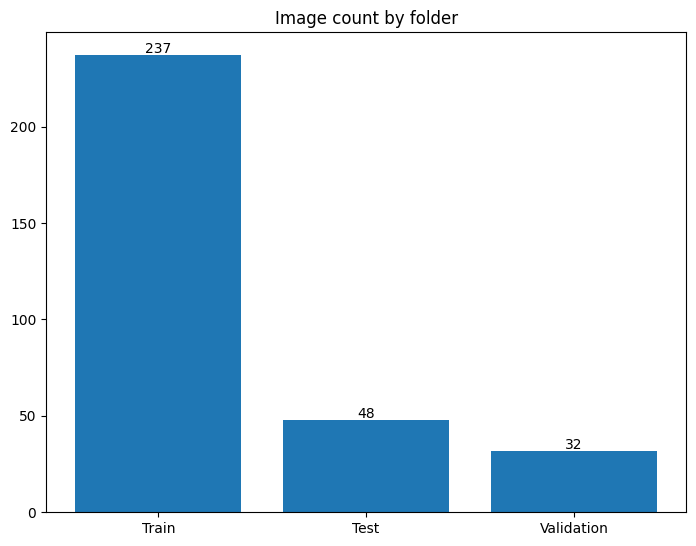

In [16]:
# Create a list of image names from train folder
train_image_names = os.listdir(YOLO_DATASET_TRAIN_PATH)

# Create a list of image names from test folder
test_image_names = os.listdir(YOLO_DATASET_TEST_PATH)

# Create a list of image names from valid folder
valid_image_names = os.listdir(YOLO_DATASET_VALID_PATH)

# Create bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
folders = ['Train', 'Test', 'Validation']
image_count = [len(train_image_names), len(test_image_names), len(valid_image_names)]
ax.bar(folders,image_count)

# Display count values on top of each bar
for i, im_count in enumerate(image_count):
    plt.text(i, im_count+1, str(im_count), ha='center')

# Add title
plt.title("Image count by folder")
plt.show()

Display the first image from "train" folder

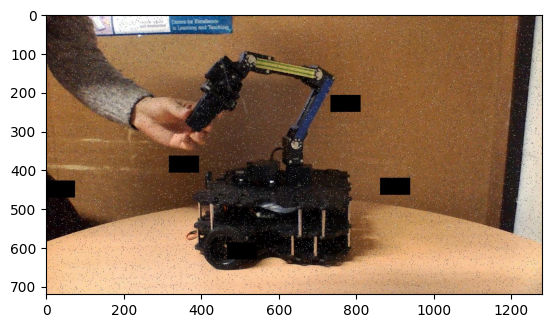

In [17]:
# Load image from file
img = mpimg.imread(YOLO_DATASET_TRAIN_PATH + train_image_names[0])

# Display the image
plt.imshow(img)

Display 9 random images in grid from the "train" folder

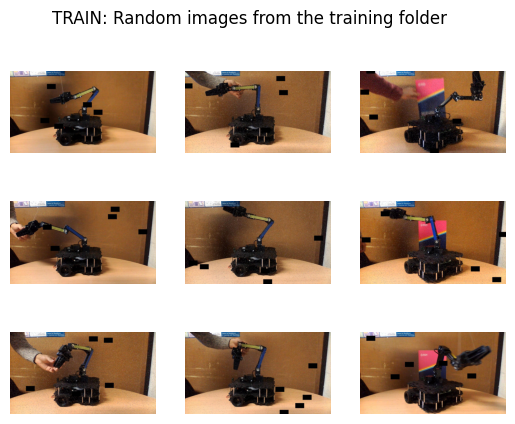

In [18]:
# Set random seed
random.seed(42)

# Generating 9 random values (image id's)
image_ids = []
for i in range(9):
  image_ids.append(random.randint(0, len(train_image_names)-1))

# Create a 3x3 grid
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.suptitle("TRAIN: Random images from the training folder")

# Display the images in the grid
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(YOLO_DATASET_TRAIN_PATH + train_image_names[image_ids[i]])
    ax.imshow(img)
    ax.axis('off')

# Show the plot
plt.show()

Display 9 random images in grid from the "test" folder

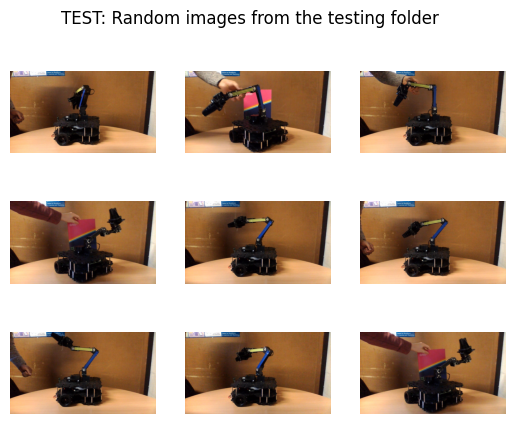

In [19]:
# Set random seed
random.seed(42)

# Generating 9 random values (image id's)
image_ids = []
for i in range(9):
  image_ids.append(random.randint(0, len(test_image_names)-1))

# Create a 3x3 grid
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.suptitle("TEST: Random images from the testing folder")

# Display the images in the grid
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(YOLO_DATASET_TEST_PATH + test_image_names[image_ids[i]])
    ax.imshow(img)
    ax.axis('off')

# Show the plot
plt.show()

Display 9 random images in grid from the "valid" folder

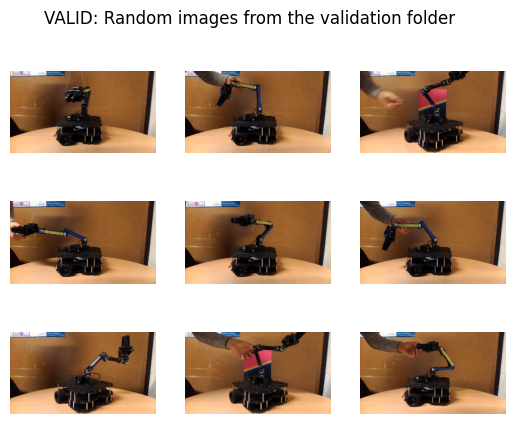

In [20]:
# Set random seed
random.seed(42)

# Generating 9 random values (image id's)
image_ids = []
for i in range(9):
  image_ids.append(random.randint(0, len(valid_image_names)-1))

# Create a 3x3 grid
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.suptitle("VALID: Random images from the validation folder")

# Display the images in the grid
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(YOLO_DATASET_VALID_PATH + valid_image_names[image_ids[i]])
    ax.imshow(img)
    ax.axis('off')

# Show the plot
plt.show()

## **Section 4: Training Models (including evaluation on validation data set)**

### **Section 4.1: Faster-RCNN (MMDectection)**

Using MMDetection Faster-RCNN model : https://github.com/open-mmlab/mmdetection

#### **Retrieving model config file**

In [21]:
# Set config file, from priovided MMDetection configs for Faster R-CNN
cfg = Config.fromfile('/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

#### **Editing model config file**

In [22]:
# Define dataset type and path to different image sub-folders.
cfg.dataset_type = 'COCODataset'

cfg.data.test.ann_file = MMDETECTION_DATASET_PATH + 'test/_annotations.coco.json'
cfg.data.test.img_prefix = MMDETECTION_DATASET_PATH + 'test/'
cfg.data.test.classes = ('Arm','Hand','Wrist','base')

cfg.data.train.ann_file = MMDETECTION_DATASET_PATH + 'train/_annotations.coco.json'
cfg.data.train.img_prefix = MMDETECTION_DATASET_PATH + 'train/'
cfg.data.train.classes = ('Arm','Hand','Wrist','base')

cfg.data.val.ann_file = MMDETECTION_DATASET_PATH + 'valid/_annotations.coco.json'
cfg.data.val.img_prefix = MMDETECTION_DATASET_PATH + 'valid/'
cfg.data.val.classes = ('Arm','Hand','Wrist','base')

# Number of classes in the model
cfg.model.roi_head.bbox_head.num_classes = 4

# Retrieve pretrained model for object detection
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'


#### **Modifying hyperparameters**

In [23]:
# Learning rate
cfg.optimizer.lr = 0.02 / 8

cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Epochs
cfg.runner.max_epochs = 3

# Set seed
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Directory to save files and logs
cfg.work_dir = './training_log'

# Set up device: 'cpu' or 'cuda'
if DEVICE == "cpu":
  cfg.device = 'cpu'
else:
  cfg.device = 'cuda'

In [24]:
# Build dataset
datasets = [build_dataset(cfg.data.train)]
print(datasets)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[
CocoDataset Train dataset with number of images 234, and instance counts: 
+----------+-------+----------+-------+-----------+-------+----------+-------+---------------+-------+
| category | count | category | count | category  | count | category | count | category      | count |
+----------+-------+----------+-------+-----------+-------+----------+-------+---------------+-------+
| 0 [Arm]  | 231   | 1 [Hand] | 231   | 2 [Wrist] | 219   | 3 [base] | 234   | -1 background | 0     |
+----------+-------+----------+-------+-----------+-------+----------+-------+---------------+-------+]


#### **Training the model**


Only run if you want to train new model, otherwise skip to next cell

In [25]:
if SOURCE_FRCNN == 1:
  # Build the detector
  faster_rcnn_model = build_detector(
      cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

  # Set classes
  faster_rcnn_model.CLASSES = datasets[0].CLASSES

  # Create work_dir
  mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))

  # Train the model
  train_detector(faster_rcnn_model, datasets, cfg, distributed=False, validate=True)

2023-05-05 12:43:47,634 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-05 12:43:47,645 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
2023-05-05 12:43:47,808 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([5, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([5]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([16, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shap

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2023-05-05 12:43:57,631 - mmdet - INFO - Epoch [1][10/117]	lr: 2.500e-03, eta: 0:05:25, time: 0.954, data_time: 0.254, memory: 3496, loss_rpn_cls: 0.0335, loss_rpn_bbox: 0.0278, loss_cls: 0.6906, acc: 78.7109, loss_bbox: 0.4179, loss: 1.1698
2023-05-05 12:44:02,363 - mmdet - INFO - Epoch [1][20/117]	lr: 2.500e-03, eta: 0:03:56, time: 0.474, data_time: 0.038, memory: 3496, loss_rpn_cls: 0.0119, loss_rpn_bbox: 0.0195, loss_cls: 0.3987, acc: 86.3965, loss_bbox: 0.5090, loss: 0.9391
2023-05-05 12:44:07,337 - mmdet - INFO - Epoch [1][30/117]	lr: 2.500e-03, eta: 0:03:25, time: 0.495, data_time: 0.035, memory: 3496, loss_rpn_cls: 0.0047, loss_rpn_bbox: 0.0173, loss_cls: 0.3184, acc: 87.7637, loss_bbox: 0.4988, loss: 0.8393
2023-05-05 12:44:12,504 - mmdet - INFO - Epoch [1][40/117]	lr: 2.500e-03, eta: 0:03:09, time: 0.517, data_time: 0.043, memory: 3496, loss_rpn_cls: 0.0037, loss_rpn_bbox: 0.0219, loss_cls: 0.2554, acc: 90.7520, loss_bbox: 0.4219, loss: 0.7028
2023-05-05 12:44:17,648 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 32/32, 7.6 task/s, elapsed: 4s, ETA:     0s

2023-05-05 12:44:57,439 - mmdet - INFO - Evaluating bbox...
2023-05-05 12:44:57,522 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.688
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.965
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.751
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.705
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.740
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.740
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.740
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.425
 Average

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).


2023-05-05 12:45:05,509 - mmdet - INFO - Epoch [2][10/117]	lr: 2.500e-03, eta: 0:01:59, time: 0.770, data_time: 0.264, memory: 3496, loss_rpn_cls: 0.0010, loss_rpn_bbox: 0.0140, loss_cls: 0.0892, acc: 96.8262, loss_bbox: 0.1862, loss: 0.2904
2023-05-05 12:45:10,448 - mmdet - INFO - Epoch [2][20/117]	lr: 2.500e-03, eta: 0:01:53, time: 0.495, data_time: 0.038, memory: 3496, loss_rpn_cls: 0.0011, loss_rpn_bbox: 0.0112, loss_cls: 0.0864, acc: 96.8262, loss_bbox: 0.1720, loss: 0.2707
2023-05-05 12:45:16,029 - mmdet - INFO - Epoch [2][30/117]	lr: 2.500e-03, eta: 0:01:48, time: 0.555, data_time: 0.042, memory: 3496, loss_rpn_cls: 0.0005, loss_rpn_bbox: 0.0122, loss_cls: 0.0791, acc: 97.0020, loss_bbox: 0.1771, loss: 0.2688
2023-05-05 12:45:21,485 - mmdet - INFO - Epoch [2][40/117]	lr: 2.500e-03, eta: 0:01:43, time: 0.546, data_time: 0.043, memory: 3496, loss_rpn_cls: 0.0007, loss_rpn_bbox: 0.0127, loss_cls: 0.0678, acc: 97.6758, loss_bbox: 0.1574, loss: 0.2386
2023-05-05 12:45:26,826 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 32/32, 7.1 task/s, elapsed: 4s, ETA:     0s

2023-05-05 12:46:08,217 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2023-05-05 12:46:08,357 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.739
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.974
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.888
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.759
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.780
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.780
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.780
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.04s).


2023-05-05 12:46:16,246 - mmdet - INFO - Epoch [3][10/117]	lr: 2.500e-03, eta: 0:00:56, time: 0.758, data_time: 0.259, memory: 3496, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0107, loss_cls: 0.0560, acc: 97.9785, loss_bbox: 0.1375, loss: 0.2045
2023-05-05 12:46:21,154 - mmdet - INFO - Epoch [3][20/117]	lr: 2.500e-03, eta: 0:00:50, time: 0.493, data_time: 0.038, memory: 3496, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0076, loss_cls: 0.0575, acc: 97.9785, loss_bbox: 0.1346, loss: 0.2003
2023-05-05 12:46:26,452 - mmdet - INFO - Epoch [3][30/117]	lr: 2.500e-03, eta: 0:00:45, time: 0.528, data_time: 0.039, memory: 3496, loss_rpn_cls: 0.0007, loss_rpn_bbox: 0.0108, loss_cls: 0.0564, acc: 97.8223, loss_bbox: 0.1384, loss: 0.2063
2023-05-05 12:46:31,859 - mmdet - INFO - Epoch [3][40/117]	lr: 2.500e-03, eta: 0:00:40, time: 0.539, data_time: 0.042, memory: 3496, loss_rpn_cls: 0.0002, loss_rpn_bbox: 0.0101, loss_cls: 0.0467, acc: 98.3301, loss_bbox: 0.1259, loss: 0.1829
2023-05-05 12:46:37,123 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 32/32, 6.4 task/s, elapsed: 5s, ETA:     0s

2023-05-05 12:47:19,089 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2023-05-05 12:47:19,229 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.758
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.972
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.888
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.340
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.773
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.790
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.790
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.790
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.338
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=10

DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.04s).


Save config file, even if model hasn't been trained. This will be required when loading a pre-trained model.

In [26]:
# Save config file
if os.path.exists('/content/training_log') == False:
  os.mkdir('/content/training_log')

cfg.dump('/content/training_log/mmdetect_custom_model_config.py')

#### **Section 4.1.2** Faster R-CNN model evaluation on validation data set

##### Loading the model

If new model has just be trained then leave the **SOURCE = 1**, but if you are using a model which has been previously trained, then change **SOURCE = 0**

In [27]:
# Load the config file, which was saved in the previous step
config_file = '/content/training_log/mmdetect_custom_model_config.py'

if SOURCE_FRCNN == 1:
  checkpoint_file = '/content/training_log/epoch_3.pth' #(checkpoint saved after training)
else:
  if OPTION_IMPORT == 1:
    checkpoint_file = '/content/LenkevicsValdisCreativePiece/Final_Year_Project_Models/mmdetection/epoch_3.pth' #(checkpoint saved after training)
  else:
    checkpoint_file = '/content/Final_Year_Project_Models/mmdetection/epoch_3.pth' #(checkpoint saved after training)

# Load model
faster_rcnn_model = init_detector(config_file, checkpoint_file, device=DEVICE)

load checkpoint from local path: /content/training_log/epoch_3.pth


In [28]:
# Convert the model into evaluation mode
faster_rcnn_model.eval()

FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

##### Declare variables for validation

In [29]:
# Build validation dataset
datasets_valid = build_dataset(cfg.data.val)

# Load all predictions into list
prediction_results_valid = []

# Declare threshold values
score_thr = 0.5
tp_iou_thr = 0.5

# Number of classes
num_classes = len(datasets_valid.CLASSES)

# Class names
class_names = ('Arm', 'Hand', 'Wrist', 'Base', 'Background')

# Loop over validation dataset (per image)
for index in range(len(datasets_valid)):
  image_name = datasets_valid.get_ann_info(index)['seg_map'][:-3] +"jpg"

  # Make predictions
  prediction_results_valid.append(inference_detector(faster_rcnn_model, MMDETECTION_DATASET_PATH + 'valid/' + image_name))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


##### Confusion Matrix (Validation data set)

In [30]:
# Declare empty confusion matrix
confusion_matrix_valid = np.zeros(shape=[num_classes + 1, num_classes + 1])

# Loop over predictions on validation dataset
for idx, per_img_res in enumerate(prediction_results_valid):
    if isinstance(per_img_res, tuple):
        res_bboxes, _ = per_img_res
    else:
        res_bboxes = per_img_res

    # Get annotations    
    ann = datasets_valid.get_ann_info(idx)
    gt_bboxes = ann['bboxes']
    labels = ann['labels']

    # Using built in function from MMDetection to calculate tp, fp,... for confusion matrix
    analyze_per_img_dets(confusion_matrix_valid, gt_bboxes, labels, res_bboxes, score_thr, tp_iou_thr)

# Normalizing the output of the confusion matrix
per_label_sums = confusion_matrix_valid.sum(axis=1)[:, np.newaxis]
normalized_confusion_matrix_valid = confusion_matrix_valid.astype(np.float32) / per_label_sums * 100

# Rounding results in confusion matrix
normalized_confusion_matrix_valid = np.round(normalized_confusion_matrix_valid, 1)

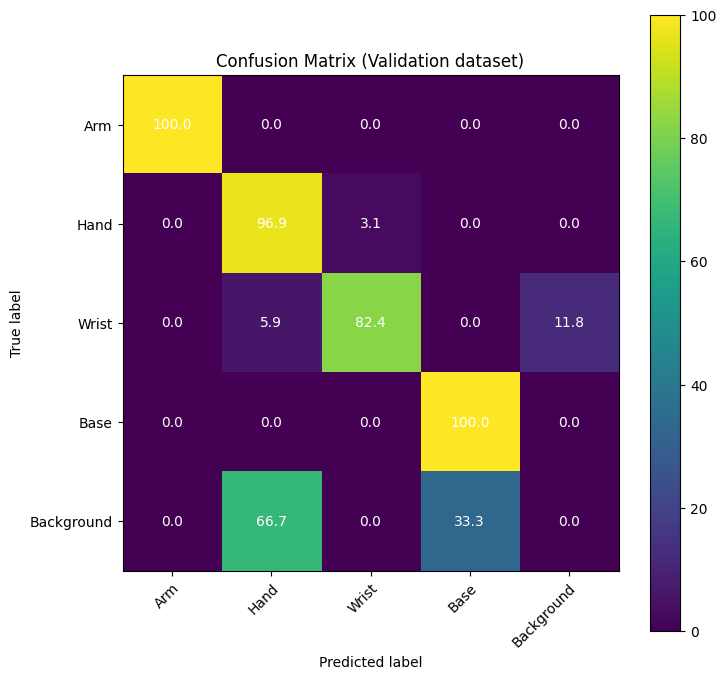

In [31]:
# Plotting the confusion matrix

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(normalized_confusion_matrix_valid, cmap='viridis')

# Set ticks and tick labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, normalized_confusion_matrix_valid[i, j],
                       ha="center", va="center", color="w")

# Set axis labels
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Add a title
ax.set_title("Confusion Matrix (Validation dataset)")

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

##### Precision-Recall (Validation data set)

In [32]:
# Create list of all annotations from validation data set
annotations_valid = []

# Append annonations to list
for i in range(len(valid_image_names)):
  annotations_valid.append(datasets_valid.get_ann_info(i))

# Using build in function from MMDetection to get recall and precision scores
mean_ap_50_valid, eval_results_50_valid = eval_map(prediction_results_valid, annotations_valid, iou_thr=score_thr)


+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 32  | 51   | 1.000  | 1.000 |
| 1     | 31  | 62   | 1.000  | 0.997 |
| 2     | 32  | 53   | 0.969  | 0.963 |
| 3     | 32  | 41   | 1.000  | 1.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.990 |
+-------+-----+------+--------+-------+


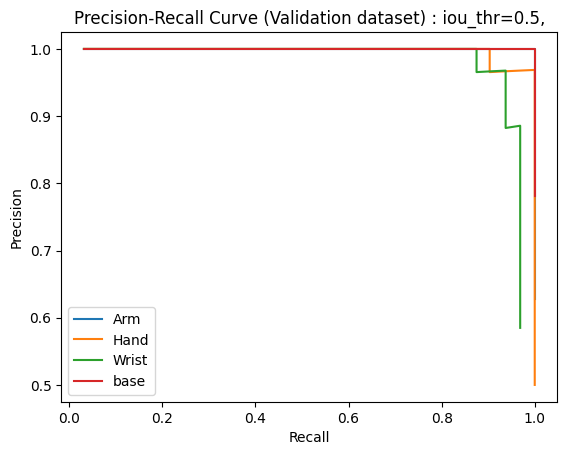

In [33]:
# Plotting each class
plt.plot(eval_results_50_valid[0]["recall"], eval_results_50_valid[0]["precision"], label = datasets_valid.CLASSES[0])
plt.plot(eval_results_50_valid[1]["recall"], eval_results_50_valid[1]["precision"], label = datasets_valid.CLASSES[1])
plt.plot(eval_results_50_valid[2]["recall"], eval_results_50_valid[2]["precision"], label = datasets_valid.CLASSES[2])
plt.plot(eval_results_50_valid[3]["recall"], eval_results_50_valid[3]["precision"], label = datasets_valid.CLASSES[3])

# Adding labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Adding title
plt.title('Precision-Recall Curve (Validation dataset) : iou_thr=0.5,')

# Adding legend
plt.legend()

plt.show()

##### mAP Plot (Validation data set)


+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 32  | 51   | 0.906  | 0.901 |
| 1     | 31  | 62   | 0.935  | 0.932 |
| 2     | 32  | 53   | 0.812  | 0.781 |
| 3     | 32  | 41   | 1.000  | 1.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.904 |
+-------+-----+------+--------+-------+

+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 32  | 51   | 1.000  | 1.000 |
| 1     | 31  | 62   | 1.000  | 0.997 |
| 2     | 32  | 53   | 0.969  | 0.963 |
| 3     | 32  | 41   | 1.000  | 1.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.990 |
+-------+-----+------+--------+-------+

+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 32  | 51   | 1.000  | 0.997 |
| 1     | 31  | 62   | 1.000  | 0.997

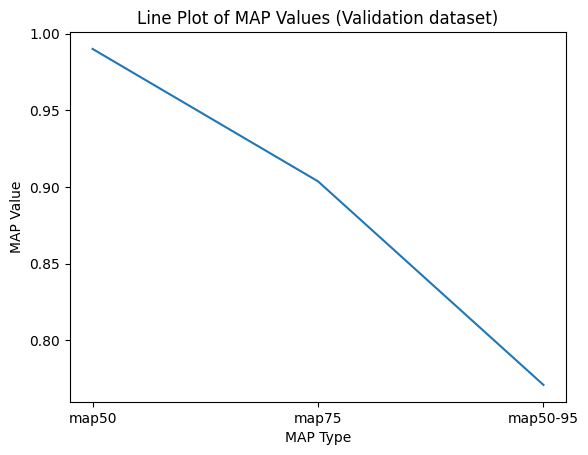

In [34]:
# Get recall and precision scores, for iou_thr=0.75
mean_ap_75_valid, eval_results_75_valid = eval_map(prediction_results_valid, annotations_valid, iou_thr=0.75)

# Create a list to store multipls thr map scores
mean_ap_50_95_list_valid = []

# Declare start and end thr
curr_thr = 0.5
end_thr = 0.95

# Loop over thr from .50 - .95, and save them in a list
for num in range(10):
  mean_ap_temp, eval_results_temp = eval_map(prediction_results_valid, annotations_valid, iou_thr=curr_thr)
  mean_ap_50_95_list_valid.append(mean_ap_temp)
  curr_thr += 0.05

# Get average mAP for 50-95
mean_ap_50_95_valid = statistics.mean(mean_ap_50_95_list_valid)
print("map50 (valid): ", mean_ap_50_valid)  # map50
print("map75 (valid): ", mean_ap_75_valid)  # map75
print("map [50-95] (valid): ", mean_ap_50_95_valid)  # map50-95

# Create the x and y data
x = ['map50', 'map75', 'map50-95']
y = [mean_ap_50_valid, mean_ap_75_valid, mean_ap_50_95_valid]

# Create the line plot
plt.plot(x, y)

# Set the title and labels of the plot
plt.title('Line Plot of MAP Values (Validation dataset)')
plt.xlabel('MAP Type')
plt.ylabel('MAP Value')

# Show the plot
plt.show()

##### Random detection result (Validation data set)

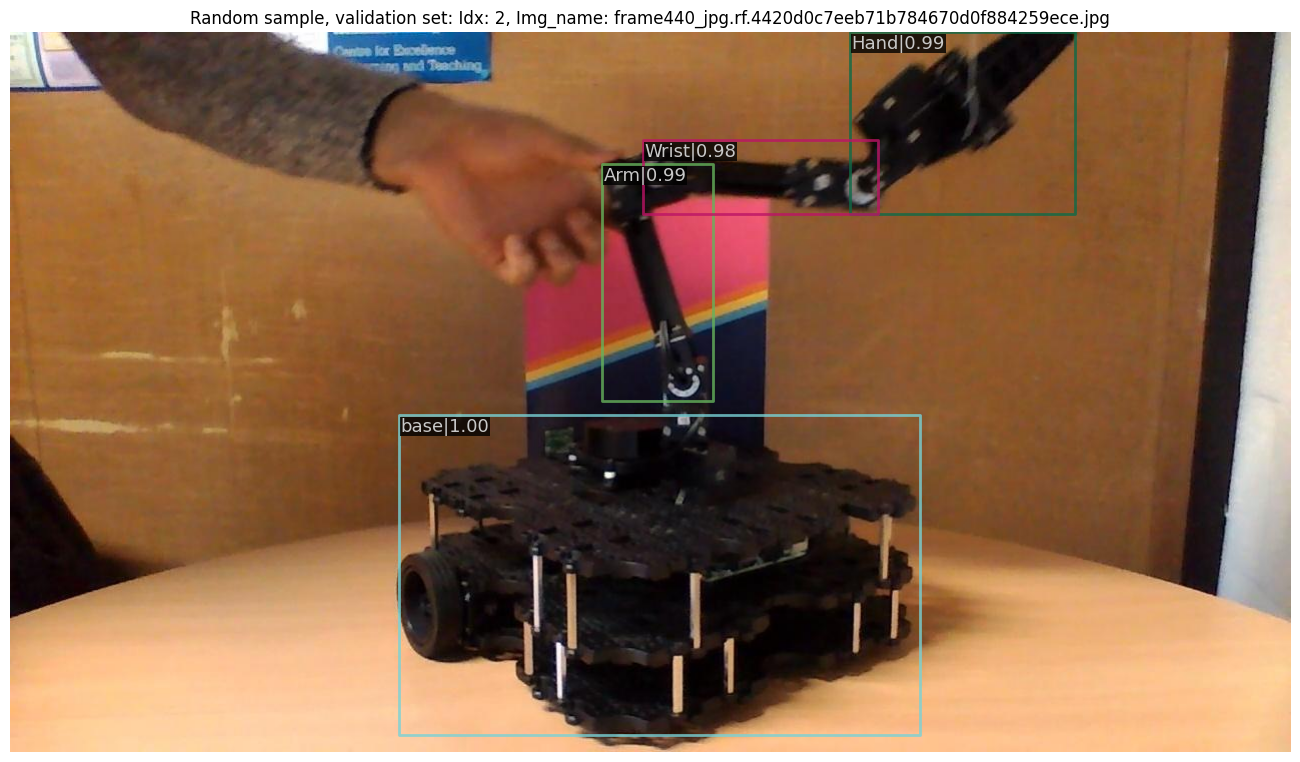

In [35]:
# Set random seed
random.seed(43)

# Declaring start and end number for random number generator
start_range = 0
end_range = len(datasets_valid)

# Generating a random number, for getting an image from validation set
random_number = random.randint(start_range, end_range)

# Getting image name from validation dataset
image_name = datasets_valid.get_ann_info(random_number)['seg_map'][:-3] +"jpg"

# Predicting on an image
result = inference_detector(faster_rcnn_model, MMDETECTION_DATASET_PATH + 'valid/' + image_name)

# Setting title
title = f"Random sample, validation set: Idx: {random_number}, Img_name: {image_name}"

# Built in MMDetection function to display prediction
show_result_pyplot(faster_rcnn_model, MMDETECTION_DATASET_PATH + 'valid/' + image_name, result, score_thr=0.5, title=title)


### **Section 4.2 Yolo v8 (Ultralytics)**

Using YOLO v8 model : https://docs.ultralytics.com/usage/python/

In [36]:
if SOURCE_YOLO == 1:
  # Load a model

  # yolov8n.pt is a model which has been trained for general object detection
  yolo_model = YOLO('yolov8n.pt')

  # Set epoch
  YOLO_EPOCHS = 30

  # Set batch
  YOLO_BATCH = 16

  # Set optimizer
  YOLO_OPTIMIZER="SGD"

  # Set learning rate
  YOLO_INITIAL_LEARNING_RATE = 0.1
  YOLO_FINAL_LEARNING_RATE = 0.1

  # Different parameters for YOLOv8: https://docs.ultralytics.com/usage/cfg/#train

  # Train the model on the custom dataset
  yolo_training_results = yolo_model.train(data=YOLO_DATASET_PATH + "data.yaml", epochs=YOLO_EPOCHS, batch=YOLO_BATCH, optimizer=YOLO_OPTIMIZER, lr0=YOLO_INITIAL_LEARNING_RATE, lrf=YOLO_FINAL_LEARNING_RATE)

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/LenkevicsValdisCreativePiece/WafflePi_Joint_Detection_yolo/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

#### **Section 4.2.2** YOLO v8 model evaluation on validation data set


In [37]:
# Load model, if not loaded already

if SOURCE_YOLO == 1:
  yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')
else:
  if OPTION_IMPORT == 1:
    yolo_model = YOLO('/content/LenkevicsValdisCreativePiece/Final_Year_Project_Models/yolo/best.pt')
  else:
    yolo_model = YOLO('/content/Final_Year_Project_Models/yolo/best.pt')

In [38]:
# Evaluate model performance on the validation set
yolo_results_val = yolo_model.val(split='val', iou=0.5)

"""

  More information about arguments:
  * https://docs.ultralytics.com/modes/val/#arguments

"""

Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/LenkevicsValdisCreativePiece/WafflePi_Joint_Detection_yolo/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]
                   all         32        127      0.972      0.955      0.979      0.801
                   Arm         32         32      0.936          1      0.991       0.78
                  Hand         32         31      0.967      0.947       0.99      0.718
                 Wrist         32         32      0.995      0.875      0.937      0.743
                  base         32         32      0.988          1      0.995      0.962
Speed: 5.2ms preprocess, 6.5ms inference, 0.0ms loss, 2.4ms postprocess

'\n\n  More information about arguments:\n  * https://docs.ultralytics.com/modes/val/#arguments\n\n'

##### Confusion Matrix (Validation data set)

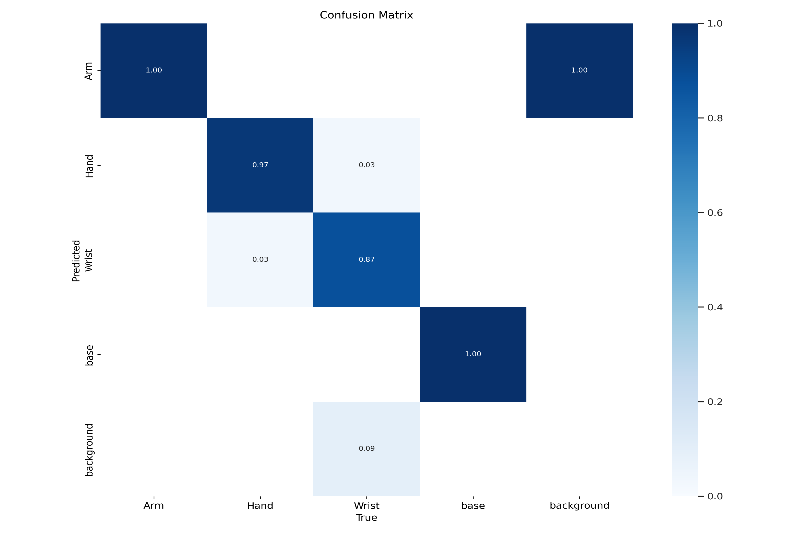

In [39]:
# Display confusion matrix (VALIDATION DATA)
yolo_conf_matrix_val = cv2.imread('/content/runs/detect/val/confusion_matrix.png', cv2.IMREAD_UNCHANGED)
yolo_conf_matrix_val = cv2.resize(yolo_conf_matrix_val, (800, 533))
cv2_imshow(yolo_conf_matrix_val)

##### Precision-Recall Curve (Validation data set)

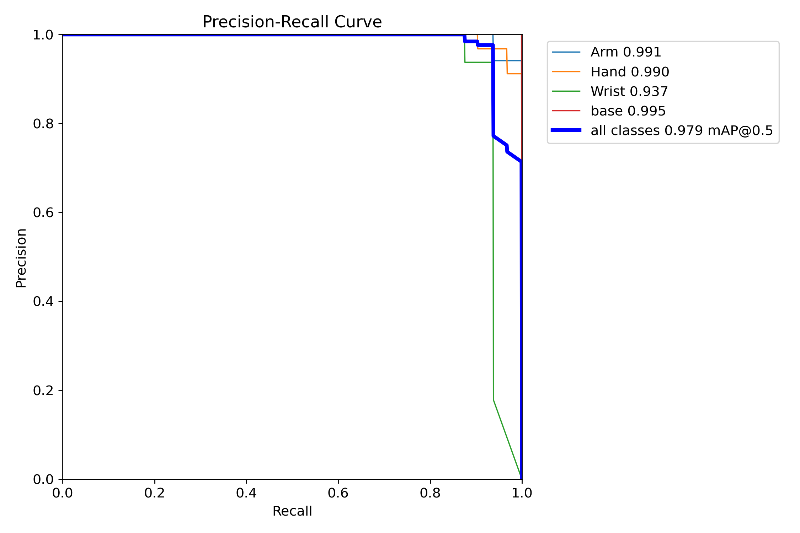

In [40]:
# Display Precision-Recall Curve (VALIDATION DATA)
yolo_precision_recall_val = cv2.imread('/content/runs/detect/val/PR_curve.png', cv2.IMREAD_UNCHANGED)
yolo_precision_recall_val = cv2.resize(yolo_precision_recall_val, (800, 533))
cv2_imshow(yolo_precision_recall_val)

##### mAP Plot (Validation data set)

map50-95  0.8006605733982048
map50  0.9785434934211275
map75  0.8944859679634825
map50-95  [    0.77952     0.71799     0.74296     0.96217]


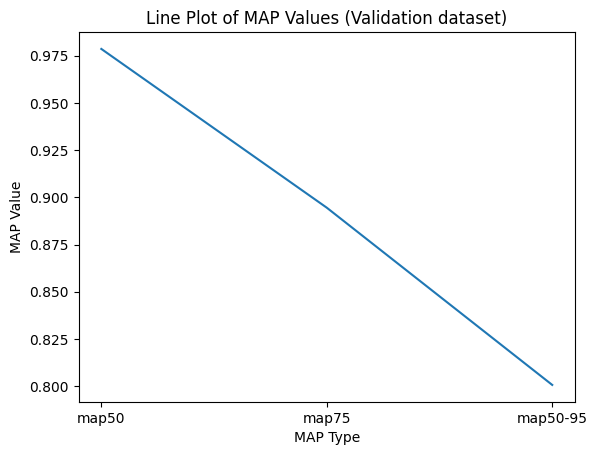

In [41]:
print("map50-95 ",yolo_results_val.box.map)  # map50-95
print("map50 ",yolo_results_val.box.map50)  # map50
print("map75 ",yolo_results_val.box.map75)  # map75
print("map50-95 ",yolo_results_val.box.maps)  # a list contains map50-95 of each category

# Create the x and y data
x = ['map50', 'map75', 'map50-95']
y = [yolo_results_val.box.map50, yolo_results_val.box.map75, yolo_results_val.box.map]

# Create the line plot
plt.plot(x, y)

# Set the title and labels of the plot
plt.title('Line Plot of MAP Values (Validation dataset)')
plt.xlabel('MAP Type')
plt.ylabel('MAP Value')

# Show the plot
plt.show()

##### Random detection result (Validation data set)


image 1/1 /content/LenkevicsValdisCreativePiece/WafflePi_Joint_Detection_yolo/valid/images/frame446_jpg.rf.248fb92132bb6729ae456ecfb93a994e.jpg: 192x320 1 Arm, 1 Hand, 1 Wrist, 1 base, 18.4ms
Speed: 1.5ms preprocess, 18.4ms inference, 2.8ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/predict


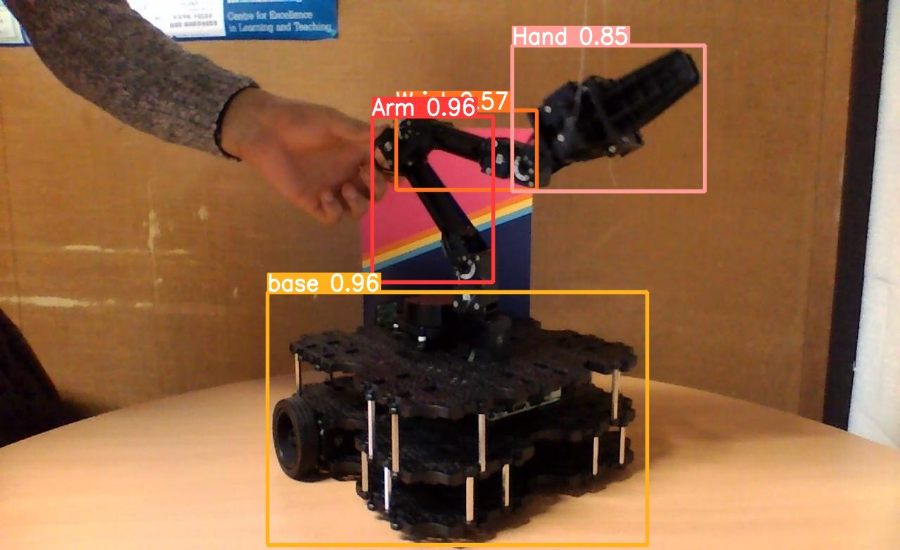

In [42]:
# Set random seed
random.seed(43)

# Declaring start and end number for random number generator
start_range = 0
end_range = len(valid_image_names)

# Generating a random number, for getting an image from validation set
random_number = random.randint(start_range, end_range)

# Predicting on an image
yolo_model.predict(YOLO_DATASET_VALID_PATH + valid_image_names[random_number], save=True, imgsz=320, conf=0.5)

prediction = os.listdir("/content/runs/detect/predict/")

# Display prediction of a random image from validation dataset
yolo_rand_val = cv2.imread("/content/runs/detect/predict/" + prediction[0], cv2.IMREAD_UNCHANGED)
yolo_rand_val = cv2.resize(yolo_rand_val, (900, 550))
cv2_imshow(yolo_rand_val)

## **Section 5: Evaluating trained model results on testing data**

Both models have integrated valuation metrics and some plot generation into their libraries. 
When training Yolov8 it generates plots and metrics into 'runs/detect/train' folder. To generate results for valuation and testing data set, `.val()` function is used, with data set parameter `split = 'val','test', 'train'`

For Faster R-CNN, it's more complicated as MMDetection library doesn't provide a automatic plot generation, however it does have build-in functions which help calculate iuo and tp,fp labels to generate these plots manually.

To generate the plots for Faster R-CNN, the author used build it functions, but it required some modification to the functions.

### **Section 5.1:** Faster R-CNN model evaluation on testing data set

#### Loading model

If didn't load model before, then can load it here.

In [43]:
# Load the config file, which was saved in the previous step
config_file = '/content/training_log/mmdetect_custom_model_config.py'

if SOURCE_FRCNN == 1:
  checkpoint_file = '/content/training_log/epoch_3.pth' #(checkpoint saved after training)
else:
  if OPTION_IMPORT == 1:
    checkpoint_file = '/content/LenkevicsValdisCreativePiece/Final_Year_Project_Models/mmdetection/epoch_3.pth' #(checkpoint saved after training)
  else:
    checkpoint_file = '/content/Final_Year_Project_Models/mmdetection/epoch_3.pth' #(checkpoint saved after training)

# Load model
faster_rcnn_model = init_detector(config_file, checkpoint_file, device=DEVICE)

load checkpoint from local path: /content/training_log/epoch_3.pth


In [44]:
# Convert the model into evaluation mode
faster_rcnn_model.eval()

FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

#### Declare variables for testing

In [45]:
# Build testing dataset
datasets_test = build_dataset(cfg.data.test)

# Load all predictions into list
prediction_results_test = []

# Loop over testing dataset (per image)
for index in range(len(datasets_test)):
  image_name = datasets_test.get_ann_info(index)['seg_map'][:-3] +"jpg"
 
  # Make predictions
  prediction_results_test.append(inference_detector(faster_rcnn_model, MMDETECTION_DATASET_PATH + 'test/' + image_name))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


#### Confusion Matrix (Testing data set)

In [46]:
# Declare empty confusion matrix
confusion_matrix_test = np.zeros(shape=[num_classes + 1, num_classes + 1])

# Loop over predictions on testing dataset
for idx, per_img_res in enumerate(prediction_results_test):
    if isinstance(per_img_res, tuple):
        res_bboxes, _ = per_img_res
    else:
        res_bboxes = per_img_res
    
    # Get annotations 
    ann = datasets_test.get_ann_info(idx)
    gt_bboxes = ann['bboxes']
    labels = ann['labels']

    # Using built in function from MMDetection to calculate tp, fp,... for confusion matrix
    analyze_per_img_dets(confusion_matrix_test, gt_bboxes, labels, res_bboxes, score_thr, tp_iou_thr)

# Normalizing the output of the confusion matrix
per_label_sums = confusion_matrix_test.sum(axis=1)[:, np.newaxis]
normalized_confusion_matrix_test = confusion_matrix_test.astype(np.float32) / per_label_sums * 100

# Rounding results in confusion matrix
normalized_confusion_matrix_test = np.round(normalized_confusion_matrix_test, 1)

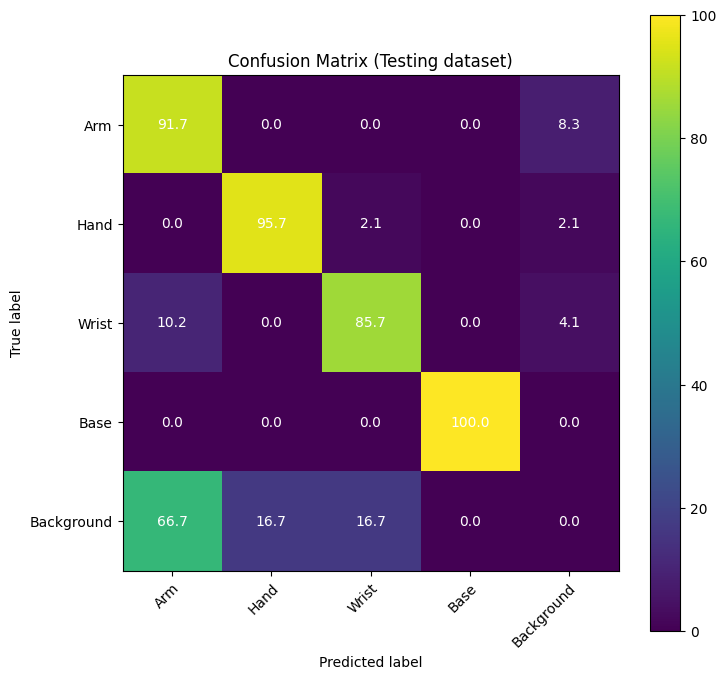

In [47]:
# Plotting the confusion matrix

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(normalized_confusion_matrix_test, cmap='viridis')

# Set ticks and tick labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, normalized_confusion_matrix_test[i, j],
                       ha="center", va="center", color="w")

# Set axis labels
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Add a title
ax.set_title("Confusion Matrix (Testing dataset)")

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

#### Precision-Recall (Testing data set)

In [48]:
# Create list of all annotations from testing data set
annotations_test = []

# Append annonations to list
for i in range(len(test_image_names)):
  annotations_test.append(datasets_test.get_ann_info(i))

# Using build in function from MMDetection to get recall and precision scores
mean_ap_50_test, eval_results_50_test = eval_map(prediction_results_test, annotations_test, iou_thr=score_thr)


+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 48  | 92   | 0.958  | 0.950 |
| 1     | 46  | 96   | 1.000  | 0.993 |
| 2     | 44  | 86   | 1.000  | 0.992 |
| 3     | 48  | 62   | 1.000  | 1.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.984 |
+-------+-----+------+--------+-------+


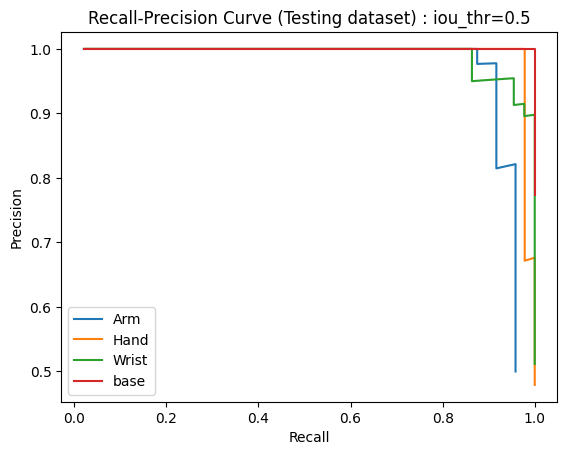

In [49]:
# Plotting each class
plt.plot(eval_results_50_test[0]["recall"], eval_results_50_test[0]["precision"], label = datasets_test.CLASSES[0])
plt.plot(eval_results_50_test[1]["recall"], eval_results_50_test[1]["precision"], label = datasets_test.CLASSES[1])
plt.plot(eval_results_50_test[2]["recall"], eval_results_50_test[2]["precision"], label = datasets_test.CLASSES[2])
plt.plot(eval_results_50_test[3]["recall"], eval_results_50_test[3]["precision"], label = datasets_test.CLASSES[3])

# Adding labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Adding title
plt.title('Recall-Precision Curve (Testing dataset) : iou_thr=0.5')

# Adding legend
plt.legend()

plt.show()

#### mAP Plot (Testing data set)


+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 48  | 92   | 0.896  | 0.874 |
| 1     | 46  | 96   | 0.870  | 0.833 |
| 2     | 44  | 86   | 0.841  | 0.829 |
| 3     | 48  | 62   | 1.000  | 1.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.884 |
+-------+-----+------+--------+-------+

+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 48  | 92   | 0.958  | 0.950 |
| 1     | 46  | 96   | 1.000  | 0.993 |
| 2     | 44  | 86   | 1.000  | 0.992 |
| 3     | 48  | 62   | 1.000  | 1.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.984 |
+-------+-----+------+--------+-------+

+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 48  | 92   | 0.958  | 0.948 |
| 1     | 46  | 96   | 1.000  | 0.993

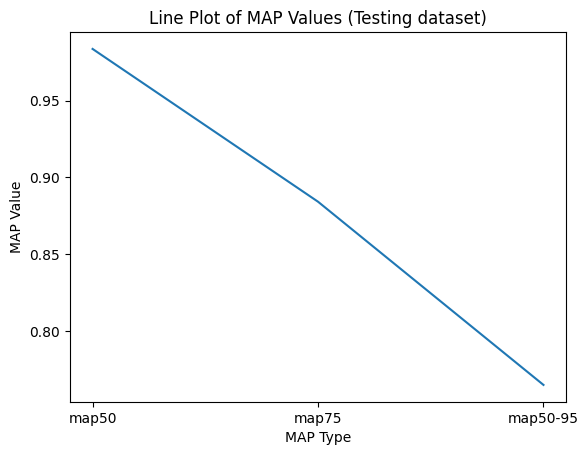

In [50]:
# Get recall and precision scores, for iou_thr=0.75
mean_ap_75_test, eval_results_75_test = eval_map(prediction_results_test, annotations_test, iou_thr=0.75)

# Create a list to store multipls thr map scores
mean_ap_50_95_list_test = []

# Declare start and end thr
curr_thr = 0.5
end_thr = 0.95

# Loop over thr from .50 - .95, and save them in a list
for num in range(10):
  mean_ap_temp, eval_results_temp = eval_map(prediction_results_test, annotations_test, iou_thr=curr_thr)
  mean_ap_50_95_list_test.append(mean_ap_temp)
  curr_thr += 0.05

# Get average mAP for 50-95
mean_ap_50_95_test = statistics.mean(mean_ap_50_95_list_test)
print("map50 (test): ", mean_ap_50_test)  # map50
print("map75 (test): ", mean_ap_75_test)  # map75
print("map [50-95] (test): ", mean_ap_50_95_test)  # map50-95

# Create the x and y data
x = ['map50', 'map75', 'map50-95']
y = [mean_ap_50_test, mean_ap_75_test, mean_ap_50_95_test]

# Create the line plot
plt.plot(x, y)

# Set the title and labels of the plot
plt.title('Line Plot of MAP Values (Testing dataset)')
plt.xlabel('MAP Type')
plt.ylabel('MAP Value')

# Show the plot
plt.show()

#### Random detection results (Testing data set)

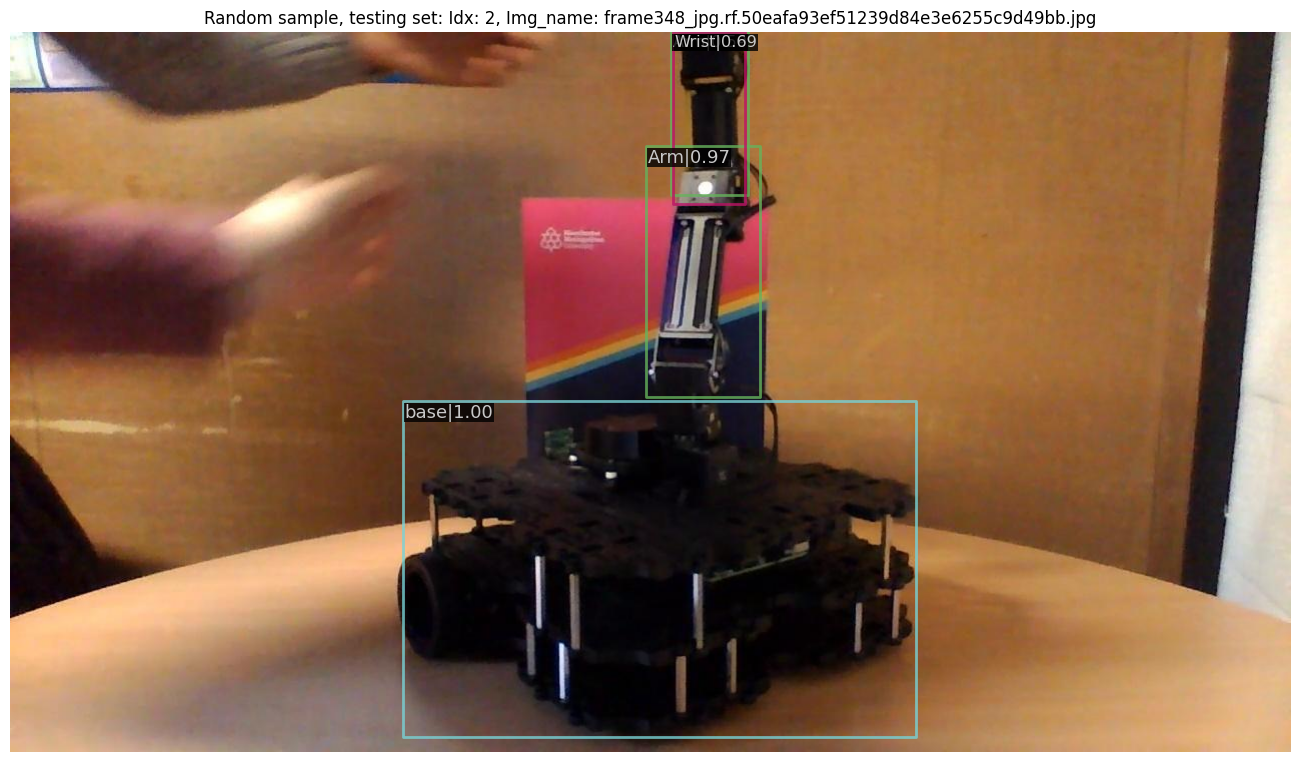

In [51]:
# Set random seed
random.seed(43)

# Declaring start and end number for random number generator
start_range = 0
end_range = len(datasets_test)

# Generating a random number, for getting an image from testing set
random_number = random.randint(start_range, end_range)

# Getting image name from testing dataset
image_name = datasets_test.get_ann_info(random_number)['seg_map'][:-3] +"jpg"

# Predicting on an image
result = inference_detector(faster_rcnn_model, MMDETECTION_DATASET_PATH + 'test/' + image_name)

# Setting title
title = f"Random sample, testing set: Idx: {random_number}, Img_name: {image_name}"

# Built in MMDetection function to display prediction
show_result_pyplot(faster_rcnn_model, MMDETECTION_DATASET_PATH + 'test/' + image_name, result, score_thr=0.5, title=title)

### **Section 5.2:** YOLO v8 Evaluation on testing data set

Load a model if not previously loaded

In [52]:
if SOURCE_YOLO == 1:
  yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')
else:
  if OPTION_IMPORT == 1:
    yolo_model = YOLO('/content/LenkevicsValdisCreativePiece/Final_Year_Project_Models/yolo/best.pt')
  else:
    yolo_model = YOLO('/content/Final_Year_Project_Models/yolo/best.pt')

In [53]:
# Evaluate model performance on the validation set
yolo_results_test = yolo_model.val(split="test", iou=0.5)

Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/LenkevicsValdisCreativePiece/WafflePi_Joint_Detection_yolo/test/labels... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<00:00, 422.78it/s]
val: New cache created: /content/LenkevicsValdisCreativePiece/WafflePi_Joint_Detection_yolo/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]
                   all         48        186      0.973      0.931      0.978      0.779
                   Arm         48         48      0.953      0.958      0.984      0.698
                  Hand         48         46          1      0.903       0.96      0.739
                 Wrist         48         44      0.949      0.864      0.974      0.711
                  base         48         48    

##### Confusion Matrix (Testing data set)

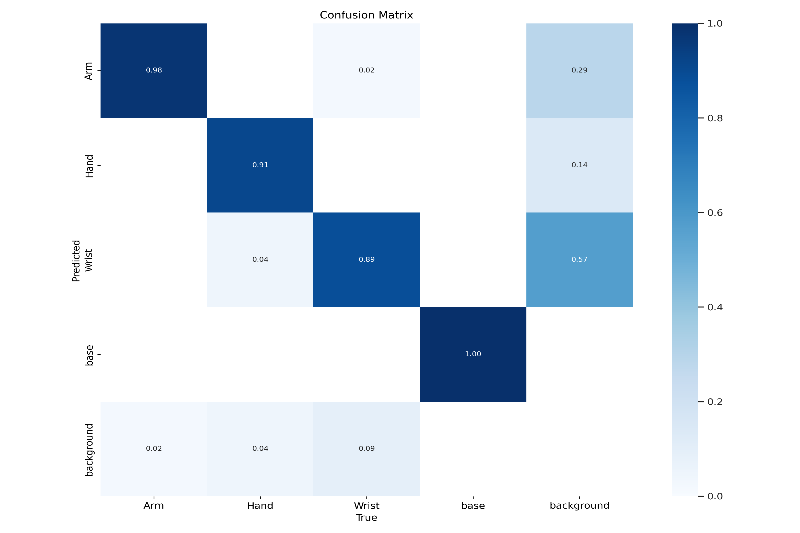

In [54]:
# Display confusion matrix (TEST DATA)
yolo_conf_matrix_test = cv2.imread('/content/runs/detect/val2/confusion_matrix.png', cv2.IMREAD_UNCHANGED)
yolo_conf_matrix_test = cv2.resize(yolo_conf_matrix_test, (800, 533))
cv2_imshow(yolo_conf_matrix_test)

#### Precision-Recall Curve (Testing data set)

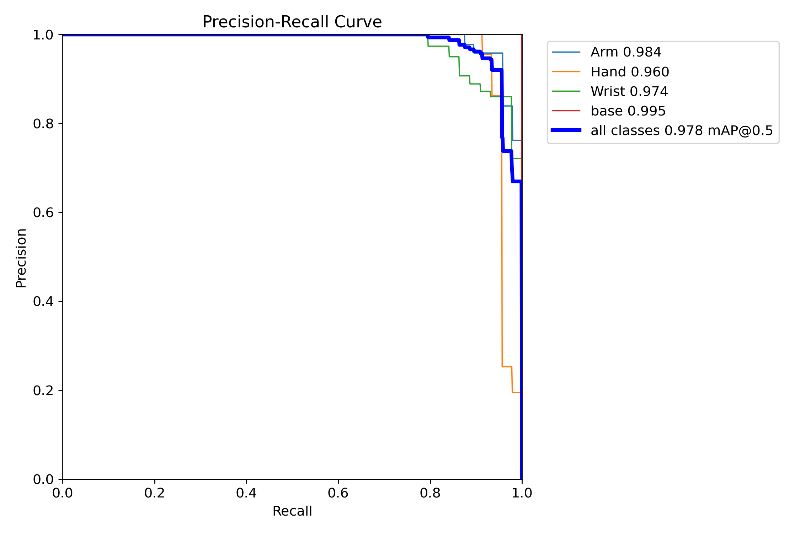

In [55]:
# Display Precision-Recall Curve (TEST DATA)
yolo_precision_recall_test = cv2.imread('/content/runs/detect/val2/PR_curve.png', cv2.IMREAD_UNCHANGED)
yolo_precision_recall_test = cv2.resize(yolo_precision_recall_test, (800, 533))
cv2_imshow(yolo_precision_recall_test)

#### mAP Plot (Testing data set)

map50-95  0.7794696480760723
map50  0.9782469318657887
map75  0.8614579782649312
map50-95  [    0.69846     0.73891     0.71134     0.96917]


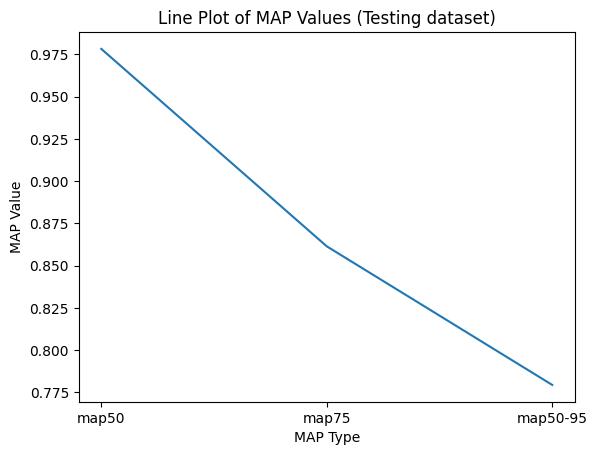

In [56]:
print("map50-95 ", yolo_results_test.box.map)  # map50-95
print("map50 ", yolo_results_test.box.map50)  # map50
print("map75 ", yolo_results_test.box.map75)  # map75
print("map50-95 ", yolo_results_test.box.maps)  # a list contains map50-95 of each category

# Create the x and y data
x = ['map50', 'map75', 'map50-95']
y = [yolo_results_test.box.map50, yolo_results_test.box.map75, yolo_results_test.box.map]

# Create the line plot
plt.plot(x, y)

# Set the title and labels of the plot
plt.title('Line Plot of MAP Values (Testing dataset)')
plt.xlabel('MAP Type')
plt.ylabel('MAP Value')

# Show the plot
plt.show()

#### First batch detection results (Testing data set)


image 1/1 /content/LenkevicsValdisCreativePiece/WafflePi_Joint_Detection_yolo/test/images/frame29_jpg.rf.cbd49732b5e5c13280ee8c55bf84b6e9.jpg: 192x320 1 Arm, 1 Hand, 1 Wrist, 1 base, 16.4ms
Speed: 0.9ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/predict2


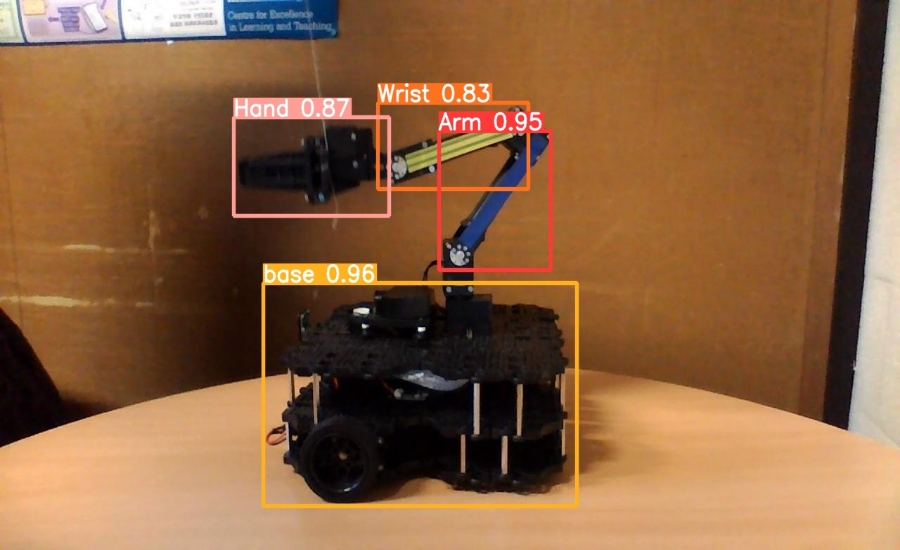

In [57]:
# Set random seed
random.seed(43)

# Declaring start and end number for random number generator
start_range = 0
end_range = len(test_image_names)

# Generating a random number, for getting an image from testing set
random_number = random.randint(start_range, end_range)

# Predicting on an image
yolo_model.predict(YOLO_DATASET_TEST_PATH + test_image_names[random_number], save=True, imgsz=320, conf=0.5)

prediction = os.listdir("/content/runs/detect/predict2/")

# Display prediction of a random image from validation dataset

yolo_rand_test = cv2.imread("/content/runs/detect/predict2/" + prediction[0], cv2.IMREAD_UNCHANGED)
yolo_rand_test = cv2.resize(yolo_rand_test, (900, 550))
cv2_imshow(yolo_rand_test)